# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [8]:
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
print(url)

https://api.openweathermap.org/data/2.5/weather?q=lodi&appid=7347725429273443d454488212dc22a8


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mango
Processing Record 4 of Set 1 | chegutu
Processing Record 5 of Set 1 | pitsunda
Processing Record 6 of Set 1 | ambilobe
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | waipawa
Processing Record 14 of Set 1 | vestmannaeyjar
Processing Record 15 of Set 1 | henties bay
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | spencer
Processing Record 20 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 21 of Set 1 | kindu
Processing Record 22 of Set 1 | 

In [13]:
display(city_weather)

{'coord': {'lon': -121.2725, 'lat': 38.1302},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 43.16,
  'feels_like': 40.96,
  'temp_min': 42.78,
  'temp_max': 44.94,
  'pressure': 1020,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 281, 'gust': 5.99},
 'clouds': {'all': 96},
 'dt': 1671763901,
 'sys': {'type': 2,
  'id': 2002610,
  'country': 'US',
  'sunrise': 1671722306,
  'sunset': 1671756541},
 'timezone': -28800,
 'id': 5367565,
 'name': 'Lodi',
 'cod': 200}

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacific grove,36.6177,-121.9166,55.42,83,0,1.01,US,1671763440
1,port alfred,-33.5906,26.8910,68.18,89,51,7.00,ZA,1671763573
2,mango,27.9797,-82.3065,69.35,88,100,5.99,US,1671763741
3,chegutu,-18.1302,30.1407,61.11,80,96,8.52,ZW,1671763741
4,pitsunda,43.1592,40.3378,37.58,57,0,4.38,GE,1671763741


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities-1.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

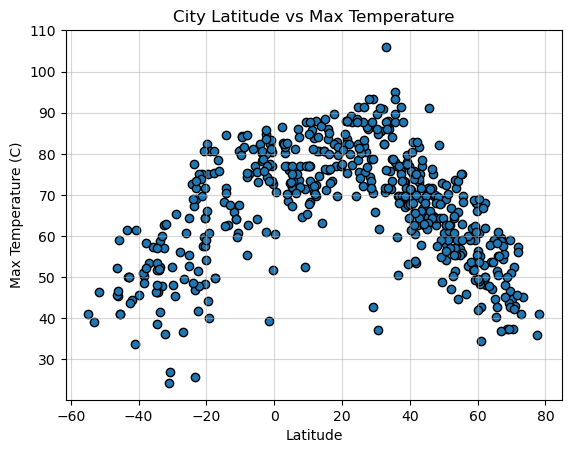

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

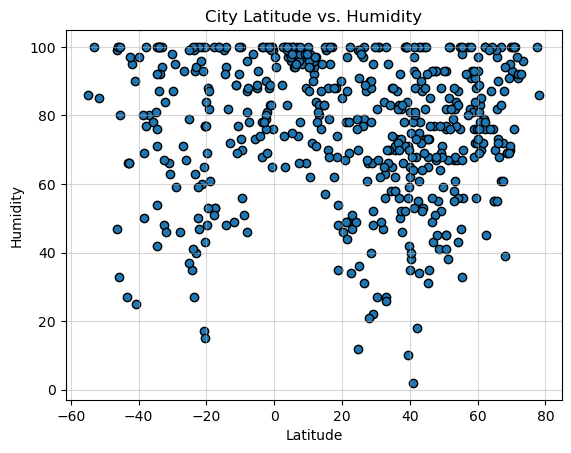

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

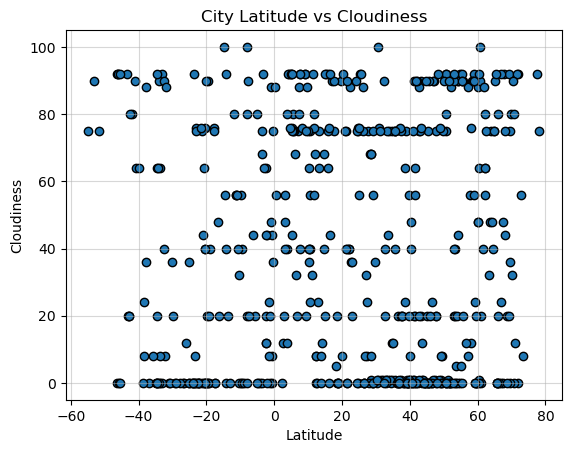

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

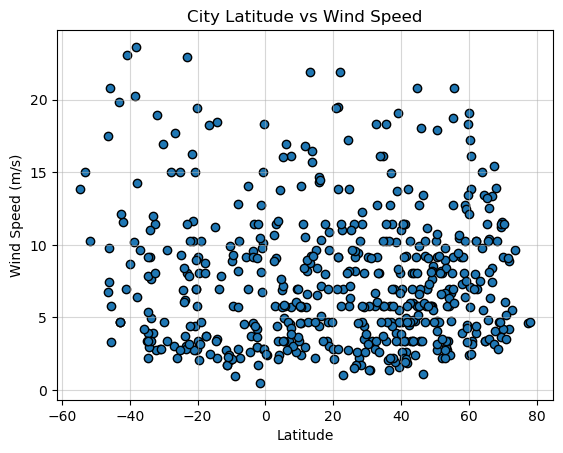

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


pvalue
rvalue


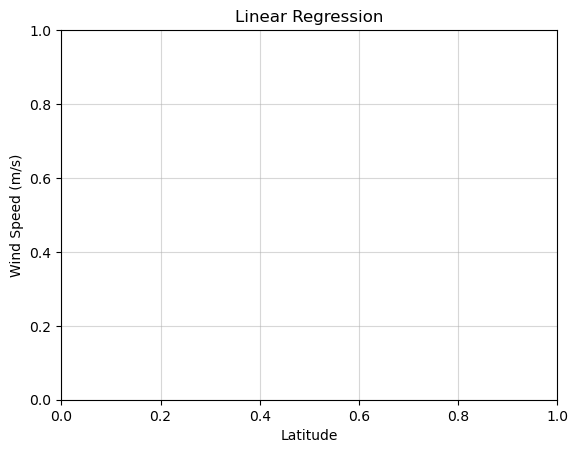

In [31]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, annotate_loc, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq, annotate_loc,fontsize=15,color="red")

# Adding previous graph properties
plt.title('Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(alpha=0.5)

print("pvalue")
print("rvalue")

# save
plt.savefig("../Fig4.png")

# Plot show
plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
6,sesheke,0,NaN,1534988025,53,-17.47,24.29,49.77,3.74
7,punta arenas,90,CL,1534986000,100,-53.16,-70.91,39.20,14.99
8,clarence town,40,AU,1534986000,48,-32.59,151.78,62.60,11.41
9,mataura,92,NZ,1534987855,100,-46.19,168.86,45.54,7.43
12,carnarvon,0,ZA,1534988027,66,-30.97,22.13,24.30,2.84


###  Temperature vs. Latitude Linear Regression Plot

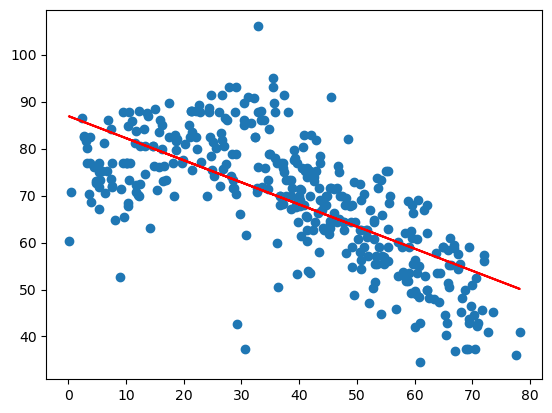

In [39]:
# Linear regression on Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10, -30), "Northern Hemisphere vs Max Temperature", 'Latitude', 'Max Temperature (C)')

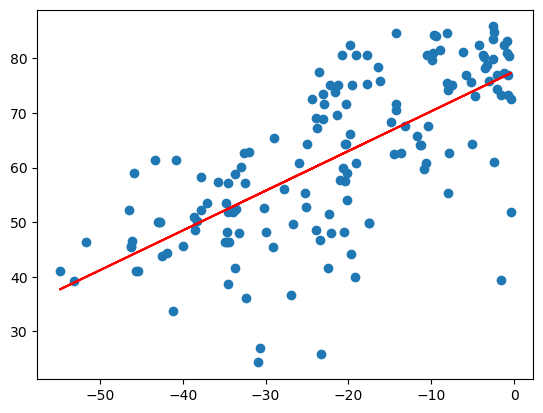

In [42]:
# Linear regression on Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-30, 10), "Southern Hemisphere vs Max Temp", 'Latitude', 'Max Temperature (C)')

**Discussion about the linear relationship:** Both scatter plots showed correlations between the temperature of the city when compared to the city's latitude. In the northern hemisphere, there was a negative correlation, showing that the further north you went the colder it becomes. Whereas in the southern hemisphere, there was a positive correlation, showing that the further south you went the warmer it becomes

### Humidity vs. Latitude Linear Regression Plot

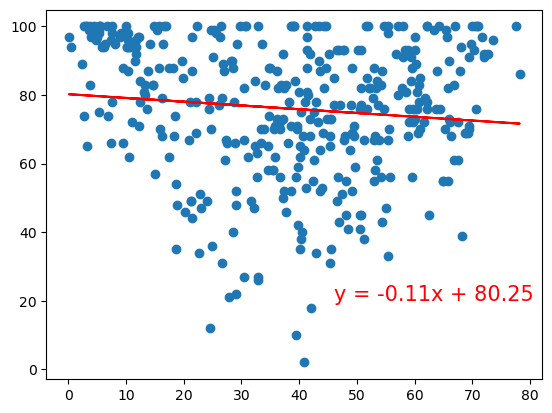

In [43]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (46, 20), "Northern Hemisphere vs Humidity", 'Latitude', 'Humidity (%)')

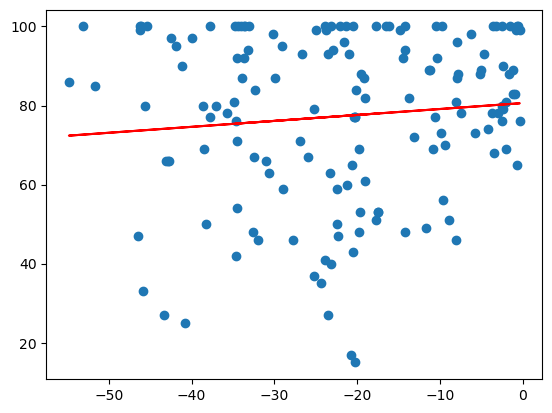

In [44]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 10), "Southern Hemisphere vs Humidity", 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** Both scatter plots had a low r-value, displaying that there was little to no relationship between the latitude of the cities and their humidity.

### Cloudiness vs. Latitude Linear Regression Plot

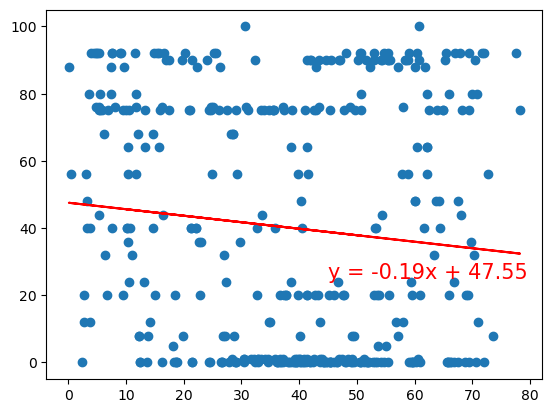

In [45]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (45, 25), "Northern Hemisphere vs Cloudiness", 'Latitude', 'Cloudiness (%)')

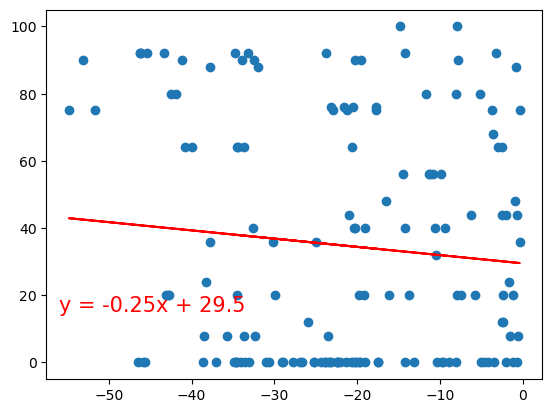

In [46]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-56, 15), "Northern Hemisphere vs Cloudiness", 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** Both the northern and southern scatter plots had low r-values, showing that there is no relationship between the cloudiness of a city and its latitude.

### Wind Speed vs. Latitude Linear Regression Plot

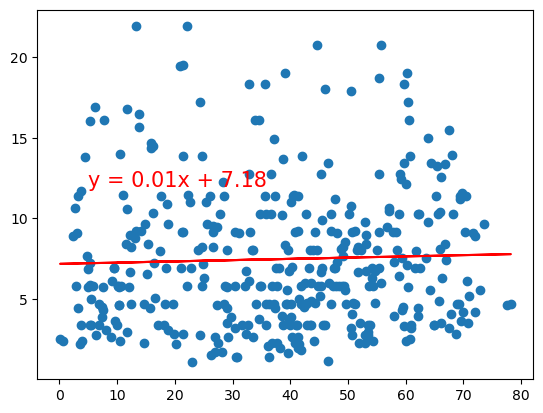

In [47]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (5, 12), "Northern Hemisphere vs Wind Speed", 'Latitude', 'Wind Speed (m/s')

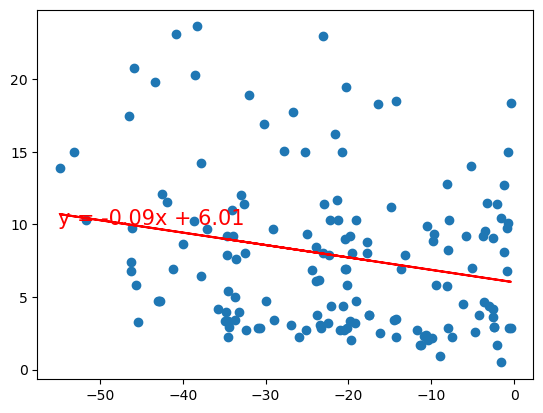

In [48]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-55, 10), "Southern Hemisphere vs Wind Speed", 'Latitude', 'Wind Speed (m/s')

**Discussion about the linear relationship:** Both northern and southern plots had low r-values and the display shows that there is no relationship between the wind speed of a city and its latitude.